----

**Disciplina**: Redes Neurais Artificiais (RENEAR)

**Professor**: Dr. Francisco de Assis Boldt

**Programa**: Mestrado Profissional em Computação Aplicada (MPCA)

**Aluno**: Arthur Gomes da Vitoria

**Data de entrega**: 12/06/2020

----

**Exercício**: Utilizar a função sklearn.datasets.make_classification do scikit learn para fazer conjunto de dados binários de diferentes tamanhos e distribuições de classe. Com isso, comparar algumas arquiteturas rasas, por exemplo, implementar um perceptron e o compará-lo com o Perceptron do scikit learn. Outro exemplo seria verificar a influência da função de custo '*hinge*' em um classificador do tipo SGD com uma SVM.

Esses foram apenas dois exemplos, entretanto, espera-se que o aluno nesta tarefa os códigos utilizados entre os alunos sejam bem diferentes.

**Solução**: 

**CARREGANDO AS BIBLIOTECAS**

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para criação conjuntos de dados sintéticos de classificação
from sklearn.datasets import make_classification

# Imports para manipulação de dados
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
import time
import math
import itertools


# Imports para customizar um classificador
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter

# Classificador
from sklearn.linear_model import Perceptron

# Imports para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

import random
random.seed(30)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
# Contruindo o algoritmo do modelo Perceptron

class Custom_Perceptron(BaseEstimator, ClassifierMixin): 

    def __init__(self, eta = 0.1, epochs = 100): # Função de inicialização da classe

        self.eta = eta # eta = taxa de aprendizagem (learning rate) - valores entre 0 e 1
        self.epochs = epochs # epoch = número de passagens no conjunto de dados de treino

    def fit(self, X, y): # Etapa de treinamento

        self.w_ = np.zeros(1 + X.shape[1]) # Inicialização do vetor de peso com valores zerados as redes neurais posteriormente com o a base de treino vão aprender esses valores
        self.errors_ = [] # Lista vazia dos erros 

        for _ in range(self.epochs): # A cada passada os erros serão calculados e assim de acordo com a taxa de aprendizado o algoritmo aprenderá com eles 
        # e encontrará  os melhores valores para os pesos sinápticos e bias

            errors = 0 # Inicilizando o erro com zero para depois ser atualizado de acordo com as passadas
            
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) # O eta ajuda no tamanho da passada 
                self.w_[1:] +=  update * xi # Atualizando os valores dos pesos que iniciaramde forma aleatória e agora estão com valores reais 
                self.w_[0] +=  update #
                errors += int(update != 0.0)
            self.errors_.append(errors) # Guardando os erros a cada passada

        return self

    def predict(self, X): # Etapa de pre
        
      return np.where(np.dot(X, self.w_[1:]) + self.w_[0] >= 0.0, 1, 0) # Combinação linear das variáveis explicativas e bias com o vetor de pesose o resultado passará pela função de ativação

Nesta tarefa, a métrica de avaliação do desempenho dos classificadores utilizada será a acurácia.

In [0]:
import random

def score(clf, X, y, cv = 5, random_state = None):
  
  if random_state != None:
    random.seed(random_state)

  X_sparse = coo_matrix(X)
  X, X_sparse, y = shuffle(X, X_sparse, y, random_state = random_state)
  scores = []

  if cv != None:

    
    t0 = time.time()
    kf = KFold(n_splits=cv, random_state = random_state)
    for train, test in kf.split(X, y):
      clf.fit(X[train],y[train])
      scores.append(clf.score(X[test],y[test]))
    t1 = time.time()

  elif cv == None:
    
    t0 = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
    t1 = time.time()

  return np.mean(scores), np.std(scores), np.min(scores), np.max(scores), np.median(scores), t1 - t0

In [0]:
class PerformanceEvaluator():
  def __init__(self):
    self.datasets = []
    self.classifiers = []
    
  def addDataset(self, dataset):
    self.datasets.append(dataset)

  def addClassifier(self, classifier):
    self.classifiers.append(classifier)

  def performance(self, cv = 5, random_state = None):
    
    statistics = ['mean', 'std', 'min', 'max', 'median', 'time']

    print('[#Samp;#Feat;Dist.]\t', end='|')
    for classifiername, classifier in self.classifiers:
      for statistic in statistics:
        print("%s [%s]" % (classifiername, statistic), end='\t|')
    print()
    
    for datasetname, X, y in self.datasets:
      print(datasetname, end= '\t| ')
      for classifiername, clf in self.classifiers:
        results = score(clf = classifier, X = X, y = y, cv = cv, random_state = random_state)
        for result in results:
          print('{0:.4f}'.format(result), end='\t\t\t| ')
      print()

O algoritmo de classificação selecionado nesta tarefa é a arquitetura rasa Perceptron implementada pelo autor da tarefa e o desenvolvido pelos autor(es) do *scikit learn*.

In [0]:
exp = PerformanceEvaluator()

exp.addClassifier(('Custom_Perceptron', Custom_Perceptron(epochs = 1000, eta = 0.0001))) # Mesmo default do SKLearn
exp.addClassifier(('SKLearn_Perceptron', Perceptron(random_state = 30)))

No total, um número aleatório entre 20 e 40 conjuntos de dados sintéticos binários serão simulados com diferentes características, isto é, distintas quantidades de instâncias e variáveis explicativas e distribuições de classe. Dentro desses conjuntos, o número de variáveis explicativas está entre 20 e 236 e o número de instâncias varia de 20 a 30.000.


In [6]:
import random
random.seed(30)

n_datasets = random.randint(20,41) # Nº de conjunto de dados
n_samples = random.sample(list(range(20, 30001)), n_datasets) # Tamanho das amostras
n_features = random.choices(range(20, 237), k = n_datasets) # Quantidade de variáveis explicativas
weights = random.choices(list(np.arange(0.01, 1, 0.01)), k = n_datasets) # Distribuição das classes

lista_datasets = {'n_samples': n_samples, 'n_features': n_features, 'weights': weights}
df_datasets = pd.DataFrame(lista_datasets, columns = ['n_samples', 'n_features', 'weights'])

df_datasets.head()

,n_samples,n_features,weights
0,26499,194,0.68
1,9496,165,0.82
2,20041,185,0.51
3,1004,142,0.42
4,20397,166,0.23


In [0]:
# Loop
for i in range(0,len(df_datasets.index)):

  # Cria o conjunto de dados com a combinação dos parâmetros aleatoriamente gerados
  X, y = make_classification(n_samples = df_datasets.iloc[i,0], n_features = df_datasets.iloc[i,1], weights= [df_datasets.iloc[i,2],1-df_datasets.iloc[i,2]], n_classes=2, shuffle = True)

  exp.addDataset(('[{:05}; {:03}; {:.2f}]'.format(df_datasets.iloc[i,0], df_datasets.iloc[i,1], df_datasets.iloc[i,2]), X, y))

A distribuição do número de variáveis explicativas, bem como o número de instâncias nos diferentes conjuntos de dados sintéticos binários podem ser visualizados nos gráficos abaixo, respectivamente. Além disso, é possível observar a quantidade de conjuntos de dados sintéticos binários desbalanceados e balanceados.


In [0]:
cats_features, bins_features = pd.cut(df_datasets['n_features'], 4, retbins=True, labels=["34-81", "82-129", "130-176", "177-224"])
cats_samples, bins_samples = pd.cut(df_datasets['n_samples'], 4, retbins=True, labels=["58-1287", "1288-2514", "2515-3741", "3742-4968"])

df_datasets['balanced'] = math.nan
for i in range(0,len(df_datasets.index)):

  if df_datasets.weights[i] == 0.5:

      df_datasets.loc[i,'balanced'] = 1

  else:

      df_datasets.loc[i,'balanced'] = 0

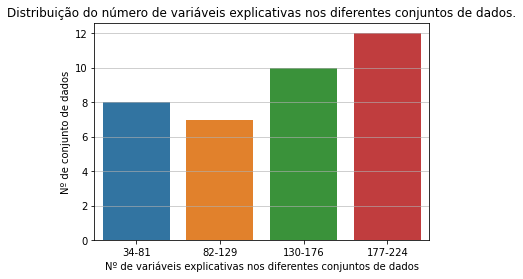

In [9]:
sns.countplot(x= cats_features)  
plt.title('Distribuição do número de variáveis explicativas nos diferentes conjuntos de dados.')
plt.xlabel('Nº de variáveis explicativas nos diferentes conjuntos de dados')
plt.ylabel('Nº de conjunto de dados')
plt.grid(axis='y', alpha=0.75)

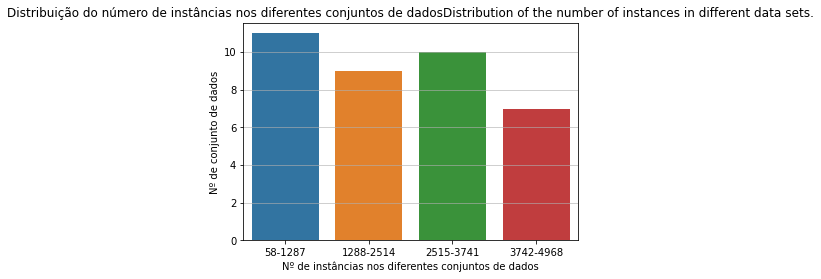

In [10]:
sns.countplot(x= cats_samples)  
plt.title('Distribuição do número de instâncias nos diferentes conjuntos de dadosDistribution of the number of instances in different data sets.')
plt.xlabel('Nº de instâncias nos diferentes conjuntos de dados')
plt.ylabel('Nº de conjunto de dados')
plt.grid(axis='y', alpha=0.75)

In [11]:
df_datasets.balanced.value_counts() # Apenas um de todos os conjuntos de dados sintéticos binários gerados é balanceado os demais são desbalanceados.

0.0    36
1.0     1
Name: balanced, dtype: int64

Nos experimentos, serão utilizadas 10-*fold* na validação cruzada de forma a avaliar o desempenho dos classificadores de redes neurais rasas em cada conjunto de dados. Os classificadores em avaliação usam os mesmos dados de treinamento e validação.

In [12]:
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
import random

exp.performance(cv = 10, random_state= 30)

[#Samp;#Feat;Dist.]	|Custom_Perceptron [mean]	|Custom_Perceptron [std]	|Custom_Perceptron [min]	|Custom_Perceptron [max]	|Custom_Perceptron [median]	|Custom_Perceptron [time]	|SKLearn_Perceptron [mean]	|SKLearn_Perceptron [std]	|SKLearn_Perceptron [min]	|SKLearn_Perceptron [max]	|SKLearn_Perceptron [median]	|SKLearn_Perceptron [time]	|
[26499; 194; 0.68]	| 0.8313			| 0.0063			| 0.8242			| 0.8449			| 0.8298			| 1.3853			| 0.8313			| 0.0063			| 0.8242			| 0.8449			| 0.8298			| 1.3497			| 
[09496; 165; 0.82]	| 0.9392			| 0.0113			| 0.9199			| 0.9579			| 0.9384			| 0.3279			| 0.9392			| 0.0113			| 0.9199			| 0.9579			| 0.9384			| 0.3311			| 
[20041; 185; 0.51]	| 0.8686			| 0.0097			| 0.8553			| 0.8848			| 0.8693			| 0.8961			| 0.8686			| 0.0097			| 0.8553			| 0.8848			| 0.8693			| 0.9315			| 
[01004; 142; 0.42]	| 0.8655			| 0.0445			| 0.8100			| 0.9406			| 0.8606			| 0.0653			| 0.8655			| 0.0445			| 0.8100			| 0.9406			| 0.8606			| 0.0656			| 
[20397; 166; 0.23]	| 0.8838			| 0.0117			| 0.8

Na tabela acima é possível observar um desempenho similar entre o algoritmo Perceptron implementado de forma customizada e utilizado do *sklearn*, exceto pelo tempo de execução da etapa de treinamento/validação.